In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import date
import requests

import nba_api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

In [2]:
#2015-2016 regular season start and end dates
start_15_16 = '2015-10-27'
end_15_16 = '2016-04-13'

#2016-2017 regular season start and end dates
start_16_17 = '2016-10-25'
end_16_17 = '2017-04-12'

#2016-2017 regular season start and end dates
start_17_18 = '2017-10-17'
end_17_18 = '2018-04-11'

#2018-2019 regular season start and end dates
start_18_19 = '2018-10-16'
end_18_19 = '2019-04-10'

In [3]:
teams_df = pd.DataFrame(teams.get_teams())
teams_df.rename(columns={'id':'TEAM_ID'}, inplace=True)

teams_df.head()

,TEAM_ID,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [4]:
# Get **all** the games so we can filter to an individual GAME_ID
result = leaguegamefinder.LeagueGameFinder()
all_games = result.get_data_frames()[0]

all_games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1612709926,MHU,Memphis Hustle,2021900026,2020-03-15,MHU vs. IWA,None,120,56,...,1.000,7,17,24,13,5,1,4,7,15.6
1,22019,1612709911,IWA,Iowa Wolves,2021900026,2020-03-15,IWA @ MHU,None,107,41,...,0.833,2,15,17,8,1,7,11,8,-16.2
2,22019,1612709920,RAP,Raptors 905,2021900566,2020-03-11,RAP vs. CPS,W,240,129,...,0.731,14,43,57,23,9,10,21,26,12.6
3,22019,1612709911,IWA,Iowa Wolves,2021900567,2020-03-11,IWA @ RGV,W,240,128,...,1.000,8,36,44,34,11,4,17,22,8.6
4,22019,1612709910,FWN,Fort Wayne Mad Ants,2021900565,2020-03-11,FWN @ GRD,W,241,111,...,0.684,18,32,50,22,9,4,17,14,16.2


In [5]:
#match NBA teams from 'teams_df' with 'all_games' to remove
#all non NBA-games from 'all_games' 
nba_games = pd.merge(teams_df, all_games, on = 'TEAM_ID', how = 'inner')

#remove columns in merged df coming from 'teams_df'
nba_games = nba_games.drop(list(teams_df.columns)[1:],1)

nba_games

,TEAM_ID,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,1610612737,22019,ATL,Atlanta Hawks,0021900969,2020-03-11,ATL vs. NYK,L,265,131,...,0.808,15,38,53,26,6,3,17,25,0.0
1,1610612737,22019,ATL,Atlanta Hawks,0021900957,2020-03-09,ATL vs. CHA,W,290,143,...,0.593,12,41,53,33,1,5,15,26,5.0
2,1610612737,22019,ATL,Atlanta Hawks,0021900943,2020-03-07,ATL @ MEM,L,240,101,...,0.857,14,32,46,23,9,2,14,24,-17.0
3,1610612737,22019,ATL,Atlanta Hawks,0021900930,2020-03-06,ATL @ WAS,L,239,112,...,0.667,6,30,36,25,9,4,17,25,-6.0
4,1610612737,22019,ATL,Atlanta Hawks,0021900905,2020-03-02,ATL vs. MEM,L,239,88,...,0.938,16,27,43,20,6,8,17,21,-39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18397,1610612766,22013,CHA,Charlotte Bobcats,0021300801,2014-02-19,CHA vs. DET,W,239,116,...,0.774,8,41,49,32,5,11,15,18,18.0
18398,1610612766,22013,CHA,Charlotte Bobcats,0021300795,2014-02-18,CHA @ DET,W,240,108,...,0.622,5,38,43,25,4,2,7,18,12.0
18399,1610612766,22013,CHA,Charlotte Bobcats,0021300781,2014-02-12,CHA @ BKN,L,240,89,...,0.467,11,32,43,17,4,4,10,15,-16.0
18400,1610612766,22013,CHA,Charlotte Bobcats,0021300770,2014-02-11,CHA vs. DAL,W,239,114,...,0.800,6,32,38,42,3,7,8,15,25.0


In [6]:
#function searches rows in 'nba_games' df sharing same 'GAME_ID' and sums PTS
#to obtain sum of final score
def total_pts_game(id_game):
    return np.sum(nba_games.loc[nba_games['GAME_ID'] == str(id_game)][['PTS']])

In [7]:
#e.g. of applying above function
total_pts_game(nba_games['GAME_ID'][0])

PTS    267
dtype: int64

In [8]:
#uses 'total_pts_game' function to create df of sum of final score for
#all games in 'nba_games' df
total_points = pd.DataFrame(list(map(lambda x : total_pts_game(nba_games['GAME_ID'][x]), list(range(len(nba_games))))))

In [9]:
#appends new column to 'nba_games' df containing combined final score per game
nba_games['COMBINED_FINAL_SCORE'] = total_points
nba_games.head(3)

,TEAM_ID,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,COMBINED_FINAL_SCORE
0,1610612737,22019,ATL,Atlanta Hawks,0021900969,2020-03-11,ATL vs. NYK,L,265,131,...,15,38,53,26,6,3,17,25,0.0,267
1,1610612737,22019,ATL,Atlanta Hawks,0021900957,2020-03-09,ATL vs. CHA,W,290,143,...,12,41,53,33,1,5,15,26,5.0,281
2,1610612737,22019,ATL,Atlanta Hawks,0021900943,2020-03-07,ATL @ MEM,L,240,101,...,14,32,46,23,9,2,14,24,-17.0,219


In [10]:
#mask to filter dates within range
mask_15_16 = (nba_games['GAME_DATE'] >= start_15_16) & (nba_games['GAME_DATE'] <= end_15_16)
mask_16_17 = (nba_games['GAME_DATE'] >= start_16_17) & (nba_games['GAME_DATE'] <= end_16_17)
mask_17_18 = (nba_games['GAME_DATE'] >= start_17_18) & (nba_games['GAME_DATE'] <= end_17_18)
mask_18_19 = (nba_games['GAME_DATE'] >= start_18_19) & (nba_games['GAME_DATE'] <= end_18_19)

In [11]:
#regular season games held between given seasons
nba_games_15_16 = nba_games.loc[mask_15_16]
nba_games_16_17 = nba_games.loc[mask_16_17]
nba_games_17_18 = nba_games.loc[mask_17_18]
nba_games_18_19 = nba_games.loc[mask_18_19]

In [12]:
nba_games_15_16

,TEAM_ID,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,COMBINED_FINAL_SCORE
377,1610612737,22015,ATL,Atlanta Hawks,0021501221,2016-04-13,ATL @ WAS,L,240,98,...,9,38,47,22,13,5,22,21,-11.0,207
378,1610612737,22015,ATL,Atlanta Hawks,0021501203,2016-04-11,ATL @ CLE,L,240,94,...,10,32,42,23,8,6,15,18,-15.0,203
379,1610612737,22015,ATL,Atlanta Hawks,0021501188,2016-04-09,ATL vs. BOS,W,240,118,...,5,39,44,31,10,10,17,22,11.0,225
380,1610612737,22015,ATL,Atlanta Hawks,0021501173,2016-04-07,ATL vs. TOR,W,239,95,...,5,36,41,23,4,12,13,19,8.0,182
381,1610612737,22015,ATL,Atlanta Hawks,0021501157,2016-04-05,ATL vs. PHX,W,242,103,...,13,37,50,26,16,3,16,21,13.0,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18251,1610612766,22015,CHA,Charlotte Hornets,0021500072,2015-11-05,CHA @ DAL,W,240,108,...,8,40,48,19,8,6,11,25,14.0,202
18252,1610612766,22015,CHA,Charlotte Hornets,0021500053,2015-11-03,CHA vs. CHI,W,241,130,...,12,40,52,26,6,4,9,11,25.0,235
18253,1610612766,22015,CHA,Charlotte Hornets,0021500039,2015-11-01,CHA vs. ATL,L,238,92,...,9,36,45,27,7,13,11,14,-2.0,186
18254,1610612766,22015,CHA,Charlotte Hornets,0021500026,2015-10-30,CHA @ ATL,L,242,94,...,13,41,54,23,7,6,18,20,-3.0,191


In [13]:
nba_games_15_16.loc[nba_games['TEAM_ABBREVIATION'] == 'LAL']

,TEAM_ID,SEASON_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,COMBINED_FINAL_SCORE
6640,1610612747,22015,LAL,Los Angeles Lakers,0021501228,2016-04-13,LAL vs. UTA,W,239,101,...,8,39,47,19,6,3,13,17,5.0,197
6641,1610612747,22015,LAL,Los Angeles Lakers,0021501209,2016-04-11,LAL @ OKC,L,240,79,...,10,38,48,15,8,1,15,20,-33.0,191
6642,1610612747,22015,LAL,Los Angeles Lakers,0021501195,2016-04-10,LAL @ HOU,L,239,110,...,7,33,40,25,10,3,18,15,-20.0,240
6643,1610612747,22015,LAL,Los Angeles Lakers,0021501184,2016-04-08,LAL @ NOP,L,240,102,...,10,24,34,18,9,5,13,23,-8.0,212
6644,1610612747,22015,LAL,Los Angeles Lakers,0021501172,2016-04-06,LAL vs. LAC,L,241,81,...,16,33,49,12,6,1,12,16,-10.0,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6717,1610612747,22015,LAL,Los Angeles Lakers,0021500077,2015-11-06,LAL @ BKN,W,241,104,...,5,35,40,14,9,6,15,22,6.0,202
6718,1610612747,22015,LAL,Los Angeles Lakers,0021500059,2015-11-03,LAL vs. DEN,L,238,109,...,11,29,40,18,9,4,10,28,-11.0,229
6719,1610612747,22015,LAL,Los Angeles Lakers,0021500045,2015-11-01,LAL vs. DAL,L,239,93,...,8,34,42,18,8,9,12,20,-10.0,196
6720,1610612747,22015,LAL,Los Angeles Lakers,0021500031,2015-10-30,LAL @ SAC,L,240,114,...,8,29,37,20,7,9,19,24,-18.0,246


In [14]:
nba_games.columns

Index(['TEAM_ID', 'SEASON_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS',
       'COMBINED_FINAL_SCORE'],
      dtype='object')

In [82]:
# Explore whether back-to-back games have lower total scores
# A back-to-back game is a game that there is a game in the previous day.

# The null hypothesis is that 
# back-to-back factor does not affect the total score. 

# We will proceed both by season and by team.

nba_seasons = [nba_games_15_16, nba_games_16_17, nba_games_17_18, nba_games_18_19]
ss = [] # For each team in each season, there are a few back-to-back games.
        # ss is a list of the standard deviation of total score for such games.
tt = [] # For each team in each season, tt is the difference between 
        # the average total score of back-to-back games and
        # tht average total score in general
btb_score_list = []
btb_number_by_season = []
z = [] # List of z-values for each team in each season
s = 0 # temporary variable that lists the final score of back-to-back games
      # for each team in each season
n = 0 # temporary variable that counts the number of back-to-back games
      # for each team in each season
m = 0 # m will be the number of back-to-back games
for i in range(4):
    for t in nba_seasons[i].TEAM_ABBREVIATION.unique():
        for j in nba_seasons[i].loc[nba_seasons[i].TEAM_ABBREVIATION == t].index[:-1]:
            if (np.datetime64(nba_seasons[i].loc[nba_seasons[i].index == j].GAME_DATE.values[0]) 
                    - np.datetime64(nba_seasons[i].loc[nba_seasons[i].index == j+1].GAME_DATE.values[0])
                    == np.timedelta64(1,'D')):
                btb_score_list.append(nba_seasons[i].loc[nba_seasons[i].index == j].COMBINED_FINAL_SCORE.values[0])
                s = s + nba_seasons[i].loc[nba_seasons[i].index == j].COMBINED_FINAL_SCORE.values[0]
                n = n + 1
                m = m + 1

        std_add = nba_seasons[i].loc[nba_seasons[i].TEAM_ABBREVIATION == t].COMBINED_FINAL_SCORE.std()
        mean_add = s/n - nba_seasons[i].loc[nba_seasons[i].TEAM_ABBREVIATION == t].COMBINED_FINAL_SCORE.mean()
        ss.append(std_add)
        tt.append(mean_add)
        z.append(mean_add*np.sqrt(82)/std_add)
        s = 0
        n = 0
        
    btb_number_by_season.append(m)  

btb_list_1 = btb_score_list[:btb_number_by_season[0]]
btb_list_2 = btb_score_list[btb_number_by_season[0]:btb_number_by_season[1]]
btb_list_3 = btb_score_list[btb_number_by_season[1]:btb_number_by_season[2]]
btb_list_4 = btb_score_list[btb_number_by_season[2]:btb_number_by_season[3]]

# A list of z-values for each season

z_1 = ((np.average(btb_list_1)-np.average(nba_games_15_16["COMBINED_FINAL_SCORE"])) 
      * np.sqrt(btb_number_by_season[0]) / np.std(btb_list_1))
z_2 = ((np.average(btb_list_2)-np.average(nba_games_16_17["COMBINED_FINAL_SCORE"])) 
      * np.sqrt(btb_number_by_season[1]-btb_number_by_season[0]) / np.std(btb_list_2))
z_3 = ((np.average(btb_list_3)-np.average(nba_games_17_18["COMBINED_FINAL_SCORE"])) 
      * np.sqrt(btb_number_by_season[2]-btb_number_by_season[1]) / np.std(btb_list_3))
z_4 = ((np.average(btb_list_4)-np.average(nba_games_18_19["COMBINED_FINAL_SCORE"])) 
      * np.sqrt(btb_number_by_season[3]-btb_number_by_season[2]) / np.std(btb_list_4))

print(z_1, "\n", z_2, "\n", z_3, "\n", z_4)

-0.39589528940553825 
 -0.40858084048953464 
 -0.6078340465160016 
 -0.7349535660297475


In [83]:
import scipy.stats as st
p_1 = st.norm.sf(abs(z_1))*2
p_2 = st.norm.sf(abs(z_2))*2
p_3 = st.norm.sf(abs(z_3))*2
p_4 = st.norm.sf(abs(z_4))*2

print(p_1, "\n", p_2, "\n", p_3, "\n", p_4)

# The p-values are all larger than 0.05. 
# Thus, we fail to reject the null hypothesis.
# So we can assume that the back-to-back factor is not a factor
# that affects the total score.

# From now on, we examine the z-values for each team in each season.

0.6921822762729087 
 0.6828472934911743 
 0.5432975458873917 
 0.46236777382946403


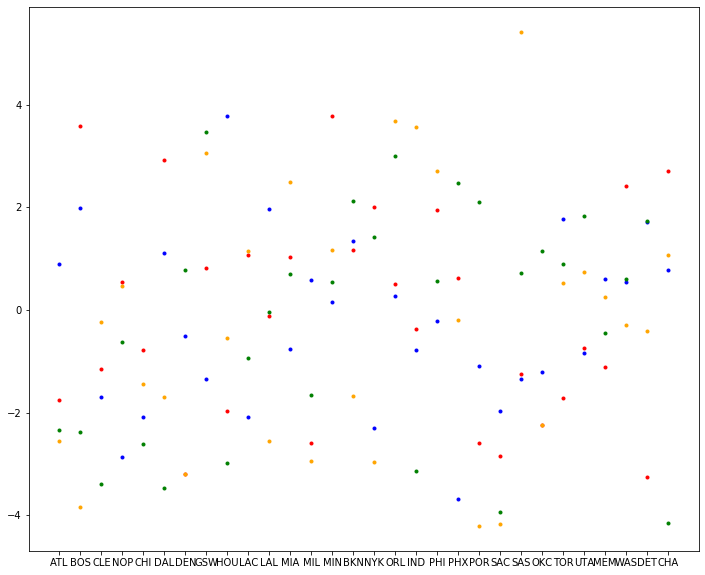

In [31]:
plt.figure(figsize = (12,10))
plt.plot(nba_seasons[0].TEAM_ABBREVIATION.unique(), z[:30], ".", c = "blue")
plt.plot(nba_seasons[1].TEAM_ABBREVIATION.unique(), z[30:60],".", c = "red")
plt.plot(nba_seasons[2].TEAM_ABBREVIATION.unique(), z[60:90],".", c = "green")
plt.plot(nba_seasons[3].TEAM_ABBREVIATION.unique(), z[90:],".", c = "orange")
plt.show()

# From this, we confirm that we fail to reject the null hypothesis in the team level.